In [1]:
%matplotlib inline
%pylab inline

import os
os.chdir('/home/pbreen/Desktop/word_analysis_socialmed')

from gensim.models import Word2Vec
import pandas as pd
import numpy as np

from sm_w2v.utils import (
    twts,
    len_iterable,
    cleaned_sentences_twt,
    coord_twts,
    
    )
from sm_w2v.plot_utils import (
    make_heatmap_w2vrelated,
    make_histogram,
    scikit_pca,
    plot_map,
    make_tsne_plot
    )

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Now load model
model = Word2Vec.load("sm_w2v/models_freq_tables/twt.model")

# print word to vec results over all tweets for words related to 'hiv'
rel_wds = model.most_similar(positive=['prophylaxis'], topn=10)
print('\n most similar word(s) to prophylaxis (according to word2vec):')
print(rel_wds)


 most similar word(s) to prophylaxis (according to word2vec):
[('preexposure', 0.6715778112411499), ('injection', 0.48899802565574646), ('pep', 0.48442623019218445), ('regimen', 0.4721137285232544), ('dosing', 0.46979522705078125), ('aspirin', 0.4634042978286743), ('pill', 0.46100419759750366), ('indicated', 0.4590379595756531), ('initiation', 0.44878873229026794), ('regimens', 0.4487074315547943)]


# Do time Series

,preexposure,injection,pep,regimen,dosing,aspirin,pill,indicated,initiation,regimens
date (YYYYWW),,,,,,,,,,
201546,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
201547,0.000118,0.000521,0.001119,0.000184,0.000000,0.000047,0.002795,0.000059,0.000018,0.000065
201548,0.000920,0.000407,0.001291,0.000240,0.000036,0.000124,0.013015,0.000095,0.000000,0.000069
201549,0.000979,0.000574,0.002661,0.000263,0.000052,0.000070,0.009374,0.000036,0.000047,0.000061
201550,0.000605,0.000634,0.001543,0.000334,0.000086,0.000060,0.010692,0.000026,0.000127,0.000081
201551,0.000233,0.000421,0.001421,0.000307,0.000114,0.000064,0.003951,0.000050,0.000040,0.000015
201552,0.000306,0.000262,0.001093,0.000495,0.000044,0.000102,0.002913,0.000029,0.000000,0.000073
201601,0.000254,0.000521,0.001401,0.000687,0.000115,0.000816,0.005643,0.000023,0.000106,0.000189
201602,0.000269,0.001014,0.001061,0.001022,0.000104,0.001308,0.004783,0.000043,0.000013,0.000143


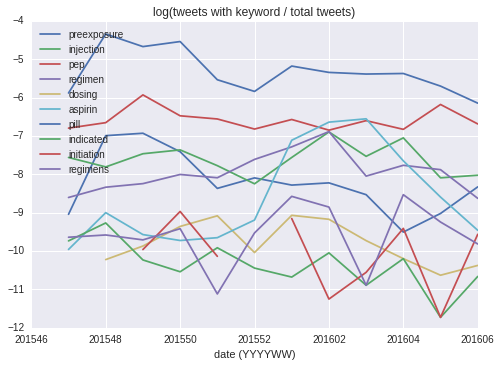

In [3]:
# display and plot
count_word_week = pd.read_csv("sm_w2v/models_freq_tables/twt_prophylaxis_wdfreq.csv",
                              index_col=0,
                             )
str_dates = [str(item) for item in count_word_week.index]
count_word_week.index = str_dates
count_word_week.index.name = "date (YYYYWW)"
display(count_word_week)
# add min and take log
count_word_week = count_word_week.apply(lambda x: np.log(x + np.min(x)))
count_word_week.plot(title="log(tweets with keyword / total tweets)")

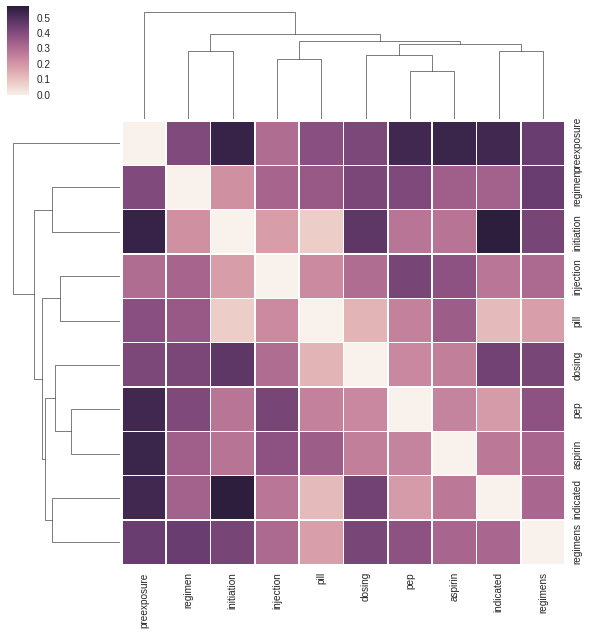

In [4]:
# make heatmap (distance between top 10 word-vectors related to 'prophylaxis'
# over all tweets)
make_heatmap_w2vrelated(model, rel_wds=rel_wds)

# Do PCA

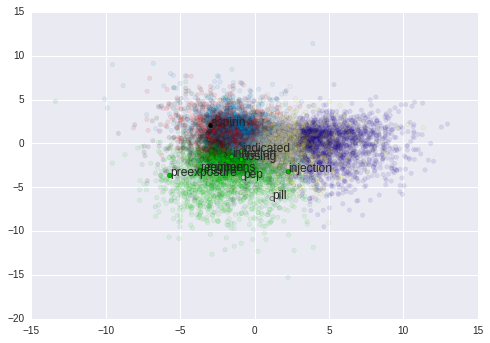

explained variance ratio: 
[ 0.05126386  0.0353181 ]


In [5]:
# PCA (visualization of all words in 2D)
explained_variances = scikit_pca(model, rel_wds, cluster="kmeans")
print("explained variance ratio: ")
print(explained_variances)